In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.getcwd()

PROJECT_DIR = "/content/drive/MyDrive/Projects/kitchen-monitoring/"

In [10]:
!pip install -e /content/drive/MyDrive/Projects/kitchen-monitoring/

Obtaining file:///content/drive/MyDrive/Projects/kitchen-monitoring
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 127.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/

In [3]:
from ultralytics import YOLO
from PIL import Image
from kitchen.visualization import draw_bboxes_xyxy
from kitchen.visual_tasks import crop_image
from kitchen.yolo import yolo_to_bbox_xyxy
from kitchen.file_tools import read_lines
import cv2
from ultralytics.utils.plotting import Annotator, colors




In [ ]:
# image = Image.open("data/detection/train/images/img_000011.jpg").convert("RGB")
# label = read_lines("data/detection/train/labels/img_000011.txt")
# bboxes = [yolo_to_bbox_xyxy(yolo_str, image.height, image.width) for yolo_str in label]
# bboxes
# draw_bboxes_xyxy(image, bboxes)

In [4]:
detector = YOLO(PROJECT_DIR + "models/yolo11m.pt")
dish_classifier = YOLO(PROJECT_DIR + "models/yolo11m-cls.pt")
tray_classifier = YOLO(PROJECT_DIR + "models/yolo11m-cls.pt")

# detector = YOLO("runs/detect/train6/weights/best.pt")
# dish_classifier = YOLO("runs/classify/train5/weights/best.pt")
# tray_classifier = YOLO("runs/classify/train6/weights/best.pt")

In [6]:
detector.train(
    data=PROJECT_DIR + "data/detection/dataset.yaml",
    epochs=100,
    batch=10,
    device="cuda",
    save_period=1,
    verbose=False
  )


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=10, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Projects/kitchen-monitoring/data/detection/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/Projects/kitchen-monitoring/models/yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize

train: Scanning /content/drive/MyDrive/Projects/kitchen-monitoring/data/detection/train/labels.cache... 1040 images, 10 backgrounds, 0 corrupt: 100%|██████████| 1050/1050 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 3.4±3.2 ms, read: 9.8±3.8 MB/s, size: 40.4 KB)


val: Scanning /content/drive/MyDrive/Projects/kitchen-monitoring/data/detection/val/labels.cache... 261 images, 0 backgrounds, 0 corrupt: 100%|██████████| 261/261 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.00046875), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       5.2G     0.9485      1.342      1.221         28        640: 100%|██████████| 105/105 [00:44<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.25it/s]


                   all        261        374      0.404      0.591      0.368      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.55G      1.025      1.151      1.278         23        640: 100%|██████████| 105/105 [00:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.49it/s]

                   all        261        374     0.0308      0.385     0.0253    0.00775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.61G      1.032      1.038      1.269         26        640: 100%|██████████| 105/105 [00:39<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.92it/s]

                   all        261        374      0.211      0.212      0.139     0.0883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.68G      1.028      1.017      1.274         31        640: 100%|██████████| 105/105 [00:40<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.47it/s]

                   all        261        374      0.435      0.744      0.637       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.68G      0.944     0.9148      1.219         37        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.48it/s]

                   all        261        374      0.711       0.65      0.705      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.68G     0.9491      0.874      1.227         16        640: 100%|██████████| 105/105 [00:39<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.46it/s]

                   all        261        374      0.848      0.879      0.943      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.68G     0.9148       0.82      1.205         36        640: 100%|██████████| 105/105 [00:40<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.09it/s]

                   all        261        374      0.773       0.86      0.867      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.75G     0.9049      0.816      1.197         25        640: 100%|██████████| 105/105 [00:39<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.22it/s]

                   all        261        374      0.756      0.864      0.905      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.81G     0.8362     0.7332      1.162         28        640: 100%|██████████| 105/105 [00:39<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.47it/s]

                   all        261        374      0.866      0.938      0.964      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.88G     0.8378     0.7137      1.152         26        640: 100%|██████████| 105/105 [00:39<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.20it/s]

                   all        261        374      0.969      0.938      0.987      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.95G     0.8018     0.6758      1.145         29        640: 100%|██████████| 105/105 [00:39<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.23it/s]

                   all        261        374      0.957       0.94      0.978      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.95G      0.781     0.6442       1.13         29        640: 100%|██████████| 105/105 [00:39<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.42it/s]

                   all        261        374      0.926      0.937      0.969      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.95G     0.8074     0.6626      1.148         25        640: 100%|██████████| 105/105 [00:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.50it/s]

                   all        261        374      0.955      0.954      0.983      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.95G     0.7788      0.654      1.127         32        640: 100%|██████████| 105/105 [00:39<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.27it/s]

                   all        261        374      0.945      0.952      0.983      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.95G     0.7618     0.6342       1.13         29        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.02it/s]

                   all        261        374      0.954      0.949       0.98       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.95G      0.762     0.6172      1.114         33        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.46it/s]

                   all        261        374      0.981      0.948      0.982       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.95G     0.7487     0.5852       1.11         28        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.49it/s]

                   all        261        374      0.969      0.961      0.982      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.95G     0.7384     0.5776      1.103         28        640: 100%|██████████| 105/105 [00:39<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.50it/s]

                   all        261        374      0.959      0.957      0.988      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.95G     0.7512     0.5886      1.109         29        640: 100%|██████████| 105/105 [00:39<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.31it/s]

                   all        261        374      0.985      0.958      0.984      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.95G     0.7245     0.5644      1.105         43        640: 100%|██████████| 105/105 [00:39<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.02it/s]

                   all        261        374      0.979      0.955      0.984       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.95G     0.7116     0.5749      1.093         18        640: 100%|██████████| 105/105 [00:39<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.48it/s]

                   all        261        374      0.964      0.962      0.992      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.95G     0.7187     0.5676      1.088         27        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.48it/s]

                   all        261        374      0.972      0.965      0.987      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.95G     0.7106     0.5464      1.089         37        640: 100%|██████████| 105/105 [00:39<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.28it/s]

                   all        261        374       0.96      0.969      0.985      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.95G     0.6955     0.5403      1.086         30        640: 100%|██████████| 105/105 [00:39<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.13it/s]

                   all        261        374      0.959      0.929      0.981      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.95G     0.6748     0.5213      1.069         26        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.48it/s]

                   all        261        374      0.991      0.964      0.986       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.95G     0.6862     0.5297      1.077         32        640: 100%|██████████| 105/105 [00:39<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.50it/s]

                   all        261        374      0.945       0.92      0.983       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.95G     0.6639     0.5038      1.065         26        640: 100%|██████████| 105/105 [00:40<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.46it/s]

                   all        261        374      0.977      0.975      0.992      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.95G     0.6817     0.5082      1.068         32        640: 100%|██████████| 105/105 [00:41<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.51it/s]

                   all        261        374      0.983      0.981      0.994      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.95G      0.675     0.5079      1.069         24        640: 100%|██████████| 105/105 [00:39<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.10it/s]

                   all        261        374      0.993      0.973      0.991      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.95G     0.6565     0.5087      1.056         34        640: 100%|██████████| 105/105 [00:39<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.26it/s]

                   all        261        374      0.961      0.971       0.98      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.95G     0.6533     0.4875       1.06         30        640: 100%|██████████| 105/105 [00:39<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.50it/s]

                   all        261        374       0.96      0.952      0.981       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.95G     0.6543     0.4953       1.06         28        640: 100%|██████████| 105/105 [00:39<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.48it/s]

                   all        261        374      0.978      0.971      0.988      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.95G     0.6526     0.4907       1.06         30        640: 100%|██████████| 105/105 [00:39<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.98it/s]

                   all        261        374      0.974      0.951      0.984      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.95G     0.6511     0.4767      1.056         29        640: 100%|██████████| 105/105 [00:39<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.41it/s]

                   all        261        374      0.988      0.975      0.991      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.95G     0.6352      0.465      1.055         24        640: 100%|██████████| 105/105 [00:39<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.49it/s]

                   all        261        374      0.994      0.985      0.991      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.95G     0.6349      0.465      1.046         22        640: 100%|██████████| 105/105 [00:39<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.51it/s]

                   all        261        374       0.99       0.97      0.987       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.95G      0.626     0.4521      1.042         23        640: 100%|██████████| 105/105 [00:39<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.01it/s]

                   all        261        374      0.981      0.964      0.991      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.95G     0.6247     0.4555      1.044         26        640: 100%|██████████| 105/105 [00:38<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.22it/s]

                   all        261        374      0.986      0.976      0.989      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.95G     0.6281     0.4504      1.039         28        640: 100%|██████████| 105/105 [00:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.14it/s]

                   all        261        374      0.951      0.975      0.986      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.95G     0.6114     0.4421      1.029         26        640: 100%|██████████| 105/105 [00:39<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.28it/s]

                   all        261        374      0.998      0.976      0.994      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.95G      0.603      0.433      1.026         20        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.29it/s]

                   all        261        374      0.986       0.97      0.988      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.95G     0.5852     0.4096      1.013         23        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.36it/s]

                   all        261        374       0.98      0.974      0.988       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.95G     0.6048     0.4286      1.036         35        640: 100%|██████████| 105/105 [00:39<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.03it/s]

                   all        261        374      0.984      0.976      0.989      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.95G      0.609     0.4363      1.031         18        640: 100%|██████████| 105/105 [00:39<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.20it/s]

                   all        261        374      0.993      0.967       0.99      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.95G      0.597     0.4242      1.032         29        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.52it/s]

                   all        261        374      0.983      0.982      0.988      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.95G      0.613     0.4064      1.034         33        640: 100%|██████████| 105/105 [00:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.25it/s]

                   all        261        374      0.983      0.981      0.991      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.95G     0.5986     0.4099      1.035         21        640: 100%|██████████| 105/105 [00:39<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.46it/s]

                   all        261        374      0.978      0.976      0.992      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.95G     0.5974     0.4294      1.027         35        640: 100%|██████████| 105/105 [00:42<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.48it/s]

                   all        261        374      0.995      0.983      0.993      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.95G     0.5932     0.4182       1.03         25        640: 100%|██████████| 105/105 [00:39<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.07it/s]

                   all        261        374      0.996      0.974      0.989      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.95G     0.5922     0.3996      1.022         24        640: 100%|██████████| 105/105 [00:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.49it/s]

                   all        261        374      0.987      0.977      0.992      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.95G     0.5821     0.4055       1.02         27        640: 100%|██████████| 105/105 [00:39<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.96it/s]

                   all        261        374      0.978       0.96      0.987      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.95G     0.5847     0.4092      1.013         24        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.37it/s]

                   all        261        374       0.98       0.97      0.989      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.95G     0.5692     0.3935      1.012         26        640: 100%|██████████| 105/105 [00:39<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.96it/s]

                   all        261        374      0.989      0.989      0.991        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.95G     0.5792     0.3996      1.016         26        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.46it/s]

                   all        261        374      0.995      0.971      0.988      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.95G     0.5786     0.3962      1.019         28        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.11it/s]

                   all        261        374      0.991      0.979       0.99      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.95G     0.5624     0.3892      1.009         36        640: 100%|██████████| 105/105 [00:39<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.27it/s]

                   all        261        374      0.988      0.979      0.988      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.95G      0.574     0.3996      1.018         18        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.51it/s]

                   all        261        374      0.996      0.985      0.991      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.95G     0.5555     0.3699      1.002         33        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.52it/s]

                   all        261        374      0.991      0.981      0.992      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.95G     0.5618      0.384      1.011         34        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        261        374      0.993      0.984      0.989      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.95G     0.5577     0.3842      1.007         16        640: 100%|██████████| 105/105 [00:39<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.02it/s]

                   all        261        374      0.987      0.981      0.991      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.95G     0.5646     0.3762      1.006         22        640: 100%|██████████| 105/105 [00:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.47it/s]

                   all        261        374      0.997      0.984      0.992      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.95G     0.5529     0.3649      1.009         27        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.50it/s]

                   all        261        374      0.989      0.986      0.992      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.95G     0.5437      0.364     0.9952         24        640: 100%|██████████| 105/105 [00:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.33it/s]

                   all        261        374      0.996      0.979      0.991      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.95G     0.5458     0.3685          1         35        640: 100%|██████████| 105/105 [00:39<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.94it/s]

                   all        261        374      0.997      0.982      0.991      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.95G     0.5479     0.3643      1.002         22        640: 100%|██████████| 105/105 [00:40<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.40it/s]

                   all        261        374      0.992      0.983      0.993      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.95G     0.5387     0.3617          1         29        640: 100%|██████████| 105/105 [00:40<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.31it/s]

                   all        261        374      0.993      0.986      0.992      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.95G     0.5365     0.3561      1.002         28        640: 100%|██████████| 105/105 [00:40<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        261        374      0.993      0.976      0.991      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.95G     0.5441     0.3577     0.9981         23        640: 100%|██████████| 105/105 [00:39<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.02it/s]

                   all        261        374      0.988      0.983      0.991      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.95G     0.5305     0.3531     0.9868         24        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.40it/s]

                   all        261        374      0.989      0.989      0.991        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.95G     0.5276     0.3481     0.9799         22        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.08it/s]

                   all        261        374      0.999      0.978      0.991      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.95G     0.5395     0.3505      1.003         22        640: 100%|██████████| 105/105 [00:39<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.47it/s]

                   all        261        374      0.992      0.984       0.99       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.95G     0.5316     0.3476     0.9958         33        640: 100%|██████████| 105/105 [00:39<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.02it/s]

                   all        261        374      0.992      0.983      0.991      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.95G     0.5219     0.3405     0.9875         25        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.37it/s]

                   all        261        374      0.992      0.981      0.991      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.95G     0.5261     0.3391      0.994         44        640: 100%|██████████| 105/105 [00:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.16it/s]

                   all        261        374      0.994      0.989      0.993      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.95G     0.5014     0.3236     0.9758         40        640: 100%|██████████| 105/105 [00:39<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.14it/s]

                   all        261        374      0.998       0.98      0.994      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.95G     0.5076     0.3297     0.9793         30        640: 100%|██████████| 105/105 [00:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]

                   all        261        374      0.984      0.992      0.991      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.95G     0.5104     0.3317     0.9832         24        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.47it/s]

                   all        261        374      0.995      0.973      0.991      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.95G     0.5048     0.3234     0.9745         23        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.43it/s]

                   all        261        374      0.991      0.984      0.992       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.95G     0.5051     0.3237     0.9736         31        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.28it/s]

                   all        261        374      0.995      0.977      0.991      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.95G     0.5024     0.3229     0.9763         37        640: 100%|██████████| 105/105 [00:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.48it/s]

                   all        261        374      0.994      0.979      0.991      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.95G     0.5022      0.314     0.9785         23        640: 100%|██████████| 105/105 [00:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.50it/s]

                   all        261        374      0.994      0.987      0.992      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.95G     0.5094     0.3294     0.9806         25        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.08it/s]

                   all        261        374      0.991      0.986      0.992      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.95G     0.5011     0.3119     0.9783         30        640: 100%|██████████| 105/105 [00:40<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.52it/s]

                   all        261        374      0.992      0.992      0.992      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.95G     0.4779     0.3049      0.966         28        640: 100%|██████████| 105/105 [00:39<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.28it/s]

                   all        261        374      0.994      0.982      0.992      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.95G     0.4994     0.3111     0.9757         32        640: 100%|██████████| 105/105 [00:39<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.00it/s]

                   all        261        374      0.985      0.989       0.99      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.95G     0.4775     0.3036     0.9625         30        640: 100%|██████████| 105/105 [00:39<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.51it/s]

                   all        261        374      0.989      0.989      0.991      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.95G     0.4931     0.3092     0.9668         28        640: 100%|██████████| 105/105 [00:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.48it/s]

                   all        261        374      0.983      0.989      0.992      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.95G     0.4901     0.3212     0.9748         16        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.46it/s]

                   all        261        374      0.988      0.988      0.991      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.95G     0.4803     0.3081     0.9695         17        640: 100%|██████████| 105/105 [00:39<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.97it/s]

                   all        261        374      0.994      0.984      0.992      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.95G      0.476      0.297     0.9652         31        640: 100%|██████████| 105/105 [00:39<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.28it/s]

                   all        261        374      0.994      0.984      0.991      0.915


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.95G     0.4074     0.2588     0.9154         20        640: 100%|██████████| 105/105 [00:39<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.49it/s]

                   all        261        374      0.999      0.981      0.991      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.95G     0.4001     0.2444     0.9153         13        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.47it/s]

                   all        261        374      0.999      0.981      0.991      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.95G      0.389      0.248     0.9028         22        640: 100%|██████████| 105/105 [00:39<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.98it/s]

                   all        261        374      0.992      0.989      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.95G     0.3894     0.2417     0.9046         15        640: 100%|██████████| 105/105 [00:39<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.29it/s]

                   all        261        374      0.988      0.987      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.95G     0.3856     0.2443     0.9008         15        640: 100%|██████████| 105/105 [00:42<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.98it/s]

                   all        261        374      0.992      0.988      0.994      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.95G     0.3759     0.2353     0.8937         16        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.42it/s]

                   all        261        374      0.992      0.989      0.994       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.95G     0.3758     0.2343     0.9062         16        640: 100%|██████████| 105/105 [00:39<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.23it/s]

                   all        261        374      0.992      0.989      0.994       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.95G     0.3792     0.2328     0.9042         18        640: 100%|██████████| 105/105 [00:38<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.17it/s]

                   all        261        374      0.992      0.989      0.994       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.95G     0.3741     0.2274     0.8931         15        640: 100%|██████████| 105/105 [00:39<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.26it/s]

                   all        261        374      0.991      0.989      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.95G      0.373     0.2276     0.8941         18        640: 100%|██████████| 105/105 [00:39<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.47it/s]

                   all        261        374      0.991      0.989      0.995       0.92



100 epochs completed in 1.330 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 40.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.16it/s]


                   all        261        374      0.994      0.979      0.991      0.922
Speed: 0.2ms preprocess, 11.7ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aafcc9f3190>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
dish_classifier.train(
    data=PROJECT_DIR + "data/classification/dish",
    epochs=100,
    batch=10,
    device="cuda"
  )


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=10, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Projects/kitchen-monitoring/data/classification/dish, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/Projects/kitchen-monitoring/models/yolo11m-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimiz

train: Scanning /content/drive/MyDrive/Projects/kitchen-monitoring/data/classification/dish_split/train... 3313 images, 0 corrupt: 100%|██████████| 3313/3313 [05:49<00:00,  9.47it/s]


train: New cache created: /content/drive/MyDrive/Projects/kitchen-monitoring/data/classification/dish_split/train.cache
val: Fast image access ✅ (ping: 0.7±0.2 ms, read: 0.8±1.1 MB/s, size: 7.2 KB)


val: Scanning /content/drive/MyDrive/Projects/kitchen-monitoring/data/classification/dish_split/val... 1243 images, 0 corrupt: 100%|██████████| 1243/1243 [01:56<00:00, 10.63it/s]


val: New cache created: /content/drive/MyDrive/Projects/kitchen-monitoring/data/classification/dish_split/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 49 weight(decay=0.0), 50 weight(decay=0.00046875), 50 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train4
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      1.58G     0.4932          3        224: 100%|██████████| 332/332 [00:45<00:00,  7.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:09<00:00,  6.60it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100       1.6G     0.4005          3        224: 100%|██████████| 332/332 [00:48<00:00,  6.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:08<00:00,  7.77it/s]

                   all      0.787          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100       1.6G     0.4367          3        224: 100%|██████████| 332/332 [00:43<00:00,  7.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:09<00:00,  6.61it/s]

                   all       0.91          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100      1.63G     0.3808          3        224: 100%|██████████| 332/332 [00:42<00:00,  7.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:09<00:00,  6.88it/s]

                   all      0.928          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100      1.65G     0.3649          3        224: 100%|██████████| 332/332 [00:42<00:00,  7.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:08<00:00,  7.25it/s]

                   all      0.926          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100      1.65G     0.3254          3        224: 100%|██████████| 332/332 [00:42<00:00,  7.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:09<00:00,  6.78it/s]

                   all      0.936          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      1.65G     0.2623          3        224: 100%|██████████| 332/332 [00:43<00:00,  7.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:08<00:00,  7.75it/s]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100      1.65G     0.2576          3        224: 100%|██████████| 332/332 [00:43<00:00,  7.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [02:01<00:00,  1.92s/it]

                   all      0.921          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100      1.65G     0.2208          3        224: 100%|██████████| 332/332 [00:41<00:00,  8.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:09<00:00,  6.99it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100      1.65G     0.2306          3        224: 100%|██████████| 332/332 [00:40<00:00,  8.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:09<00:00,  6.81it/s]

                   all      0.948          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100      1.65G     0.2149          3        224: 100%|██████████| 332/332 [00:41<00:00,  8.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:07<00:00,  8.25it/s]

                   all      0.916          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      1.65G      0.192          3        224: 100%|██████████| 332/332 [00:42<00:00,  7.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:08<00:00,  7.03it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100      1.65G     0.1746          3        224: 100%|██████████| 332/332 [00:41<00:00,  7.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:08<00:00,  7.53it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      1.65G     0.1646          3        224: 100%|██████████| 332/332 [00:40<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:08<00:00,  7.23it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      1.65G      0.155          3        224: 100%|██████████| 332/332 [00:41<00:00,  8.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:09<00:00,  6.95it/s]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100      1.65G     0.1406          3        224: 100%|██████████| 332/332 [00:41<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:07<00:00,  8.25it/s]

                   all      0.928          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      1.65G     0.1373          3        224: 100%|██████████| 332/332 [00:41<00:00,  8.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:09<00:00,  6.95it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      1.67G     0.1464          3        224: 100%|██████████| 332/332 [00:41<00:00,  8.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:08<00:00,  7.73it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100      1.67G     0.1436          3        224: 100%|██████████| 332/332 [00:44<00:00,  7.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:07<00:00,  7.92it/s]

                   all      0.965          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100       1.7G     0.1356          3        224: 100%|██████████| 332/332 [00:42<00:00,  7.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:09<00:00,  6.84it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100       1.7G     0.1222          3        224: 100%|██████████| 332/332 [00:42<00:00,  7.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:08<00:00,  7.20it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100       1.7G     0.1476          3        224: 100%|██████████| 332/332 [00:41<00:00,  7.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:08<00:00,  7.67it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100       1.7G     0.1148          3        224: 100%|██████████| 332/332 [00:41<00:00,  8.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:09<00:00,  6.93it/s]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100       1.7G     0.1181          3        224: 100%|██████████| 332/332 [00:41<00:00,  8.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:07<00:00,  8.22it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      1.72G     0.1171          3        224: 100%|██████████| 332/332 [00:41<00:00,  7.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:09<00:00,  6.99it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      1.72G     0.1133          3        224: 100%|██████████| 332/332 [00:41<00:00,  7.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:08<00:00,  7.09it/s]

                   all      0.962          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100      1.74G     0.1178          3        224: 100%|██████████| 332/332 [00:41<00:00,  7.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:07<00:00,  8.10it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100      1.74G     0.1075          3        224: 100%|██████████| 332/332 [00:41<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:08<00:00,  7.02it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100      1.74G     0.1015         10        224:  90%|████████▉ | 298/332 [00:37<00:05,  5.71it/s]

In [ ]:
tray_classifier.train(
    data=PROJECT_DIR + "data/classification/tray",
    epochs=100,
    batch=10,
    device="cuda"
  )

Pipeline:
- Cut video into frames
- Detect dishes and trays
- Further classify dishes and trays

In [52]:
video_path = PROJECT_DIR + "data/first.mp4"
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
out = cv2.VideoWriter(PROJECT_DIR + "data/tracking.mp4", cv2.VideoWriter_fourcc(*"MJPG"), fps, (width, height))

In [53]:
dish_classifier_path = "runs/classify/train7/weights/best.pt"
all_tracked = detector.track(
    PROJECT_DIR + "data/first.mp4",
    show=False,
    # tracker="configs/trackers/botsort.yaml",
    conf=0.2,
    iou=0.5,
    # stream=True,
    device="cuda"
)

WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs



In [60]:
detector.names

{0: 'dish', 1: 'tray'}

tensor([], device='cuda:0', size=(0, 4))


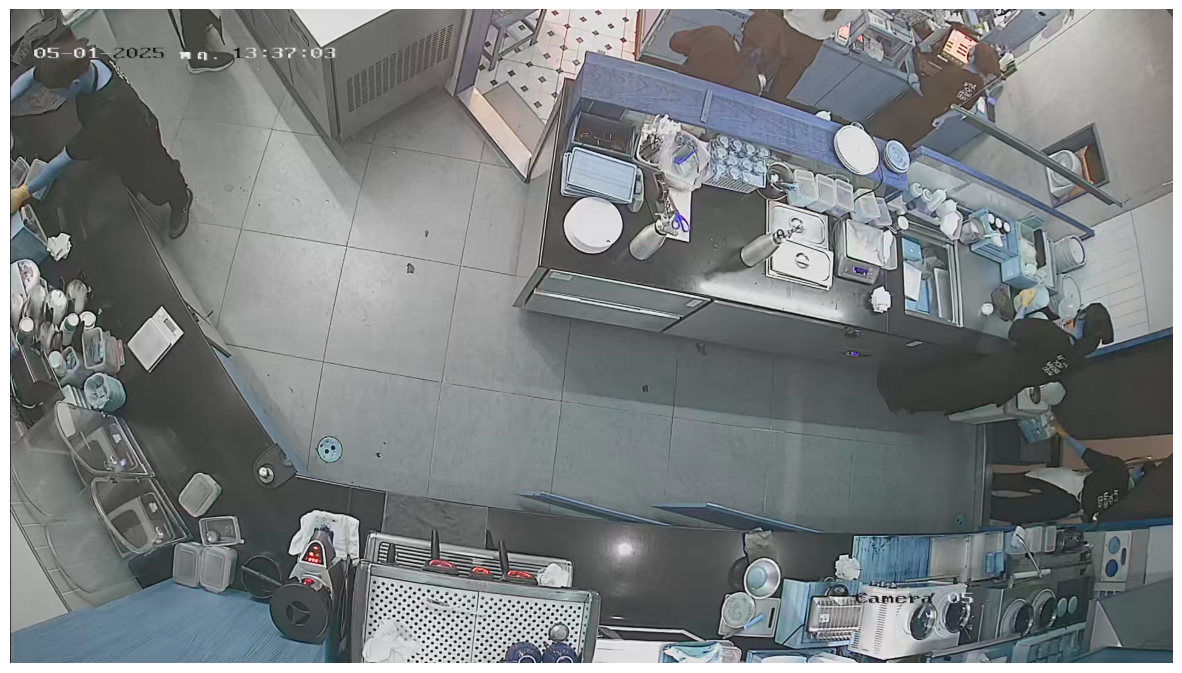

In [61]:
ret, frame = cap.read()
result = detector(source=frame, conf=0.2, iou=0.5, device="cpu")

print(result[0].boxes.xyxy)
draw_bboxes_xyxy(Image.fromarray(frame).convert("RGB"), result[0].boxes.xyxy.cpu())

0: 384x640 2 dishs, 1 tray, 111.2ms
Speed: 2.3ms preprocess, 111.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


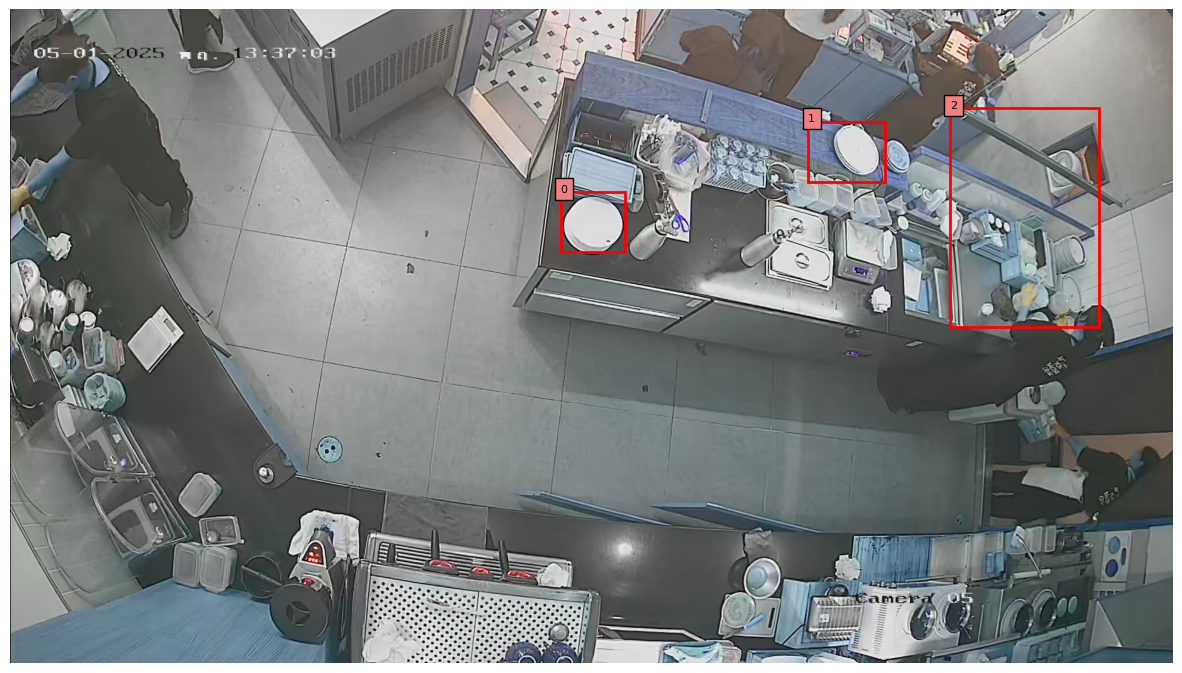

In [ ]:
import numpy as np
from PIL import Image

ret, frame = cap.read()

image = Image.fromarray(frame)

detected = detector(source=frame, conf=0.2, iou=0.5)

# image_array = np.array(frame)
draw_bboxes_xyxy(image, detected[0].boxes.xyxy)

In [19]:
dish_classifier_path = "runs/classify/train7/weights/best.pt"

while True:
    ret, frame = cap.read()

    if not ret:
        print("Done")
        break

    annotator = Annotator(frame, line_width=2, font_size=20)
    results = detector.track(
        frame,
        persist=True,
        model=dish_classifier_path,
        conf=0.2,
        iou=0.5,
        device="cuda"
      )

    if results[0].boxes.is_track and results[0].boxes is not None:
        boxes = results[0].boxes.xyxy
        classes = results[0].boxes.cls.int()
        names = [detector.names[i.item()] for i in  classes]
        track_ids = results[0].boxes.id.int().cpu().tolist()

        # Classify empty, kakigori, not empty
        for bbox, cls, name, track_id in zip(boxes, classes, names, track_ids):
            cropped = crop_image(frame, bbox)

            if cls == 0:
                subclass = dish_classifier(cropped, device="cuda")
                subclass_name = dish_classifier.names[subclass[0].probs.top1]
            elif cls == 1:
                subclass == tray_classifier(cropped, device="cuda")
                subclass_name = tray_classifier.names[subclass[0].probs.top1]

            annotator.box_label(box=bbox, color = colors(int(track_id), True), label=f"{name}-{track_id}-{subclass_name}")

    out.write(frame)

    # if cv2.waitKey(1) & 0xFF == ord("q"):
    #     break

out.release()
cap.release()


0: 384x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.1ms
Speed: 3.1ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.1ms
Speed: 5.2ms preprocess, 24.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.1ms
Speed: 3.1ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.3ms
Speed: 2.8ms preprocess, 30.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.3ms
Speed: 3.1ms preprocess, 31.3ms i